Инициализация

In [1]:
using Plots 
using StatsPlots
using DataFrames
using CSV

## Arrow Parquet

In [ ]:
Big   = "../Logs/LogEncodeBig.csv"
Small = "../Logs/LogEncodeSmall.csv"
Shuffle  = "../Logs/LogShuffle1k.csv"

df_big   = CSV.File(Big) |> DataFrame
df_small = CSV.File(Small) |> DataFrame
df_shuffle = CSV.File(Shuffle) |> DataFrame

Зависимость времени записи от размера кванта 

По графику видно, что, начиная примерно с кванта = 10000, время записи меняется незначительно и остаётся достаточно малым  

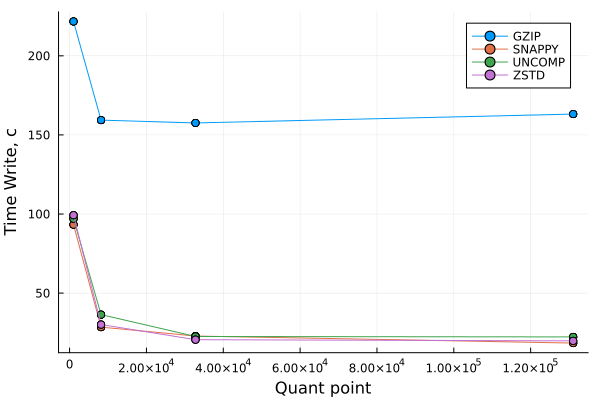

In [21]:
@df df_big plot(:quant_points, 
            :time_write, 
            group = :compresion_type, 
            xlabel = "Quant point",
            ylabel = "Time Write, c",
            marker = :circle)
# savefig("Plots/Big_WriteT(QuantPoints).png")


Зависимость коеффициента сжатия от размера кванта

Аналогично с прошлым графиком - коеффициент сжатия перестаёт значительно изеняться, начиная с кванта = 10000 точек.

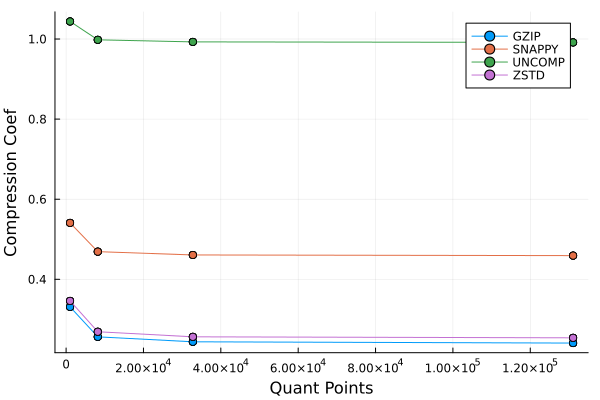

In [22]:
@df df_big plot(:quant_points, 
            :compression_coef, 
            group = :compresion_type,
            xlabel = "Quant Points",
            ylabel = "Compression Coef", 
            marker = :circle)
# savefig("Plots/Big_CompressionCoef(QuantPoints).png")

Зависимость времени чтения интервала от его размера (расхождения связаны с разными типами сжатия (выделены цветом) и разными размерами кванта записи (никак не выделены))

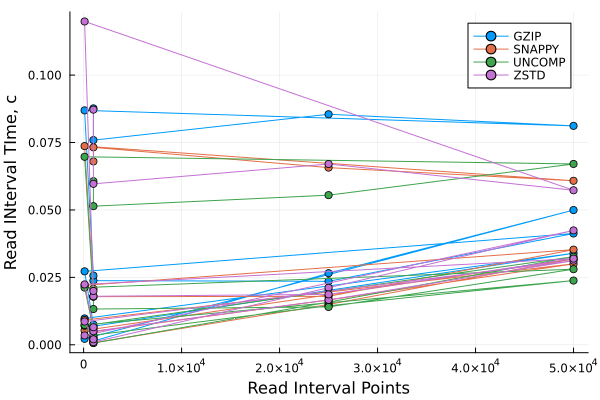

In [23]:
@df df_big plot(:read_interval_points, 
            :read_interval_time, 
            group = :compresion_type, 
            xlabel = "Read Interval Points",
            ylabel = "Read INterval TIme, c",
            marker = :circle)
# savefig("Plots/Big_ReadIntervalTime(ReadIntervalPoints).png")

Зависимость времени чтения всего файла от размера кванта

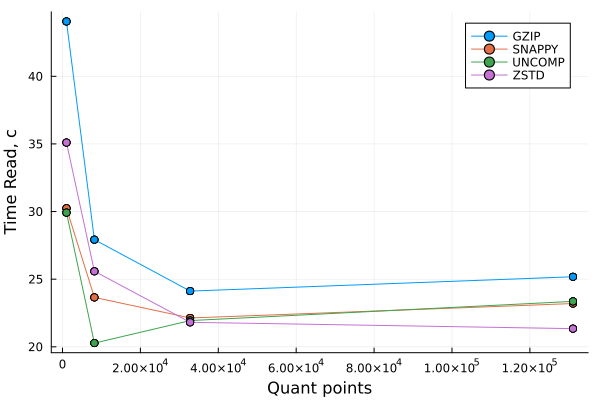

In [25]:
@df df_big plot(:quant_points, 
            :time_read, 
            group = :compresion_type, 
            xlabel = "Quant points",
            ylabel = "Time Read, c",
            marker = :circle)
# savefig("Plots/Big_ReadT(QuantPoints).png")

Зависимость врмени чтения одного кванта от его размера

Как и ожидалось - прямая зависимость. При маленьких размерах кванта "плато" не наблюдается (если оно и етсь, то на ещё более маленьких квантах, которые, по опыту других графиков, нам не интересны).

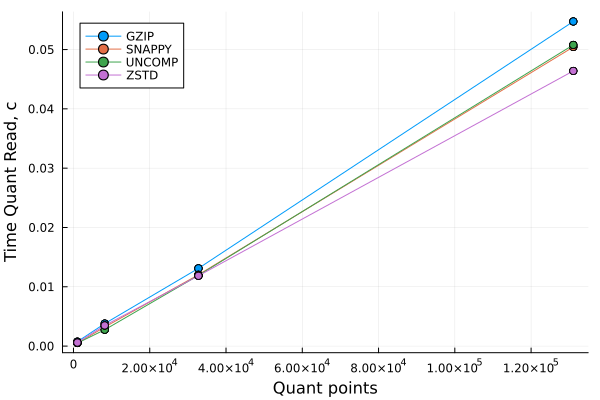

In [26]:
@df df_big plot(:quant_points, 
            :time_read_quant, 
            group = :compresion_type, 
            xlabel = "Quant points",
            ylabel = "Time Quant Read, c",
            marker = :circle)
# savefig("Plots/Big_TimeQuantRead(QuantPoints).png")

## DuckDB


In [2]:
File   = "../Logs/LogDuckDB5.csv"
Rand   = "../Logs/LogDuckDB5-rand.csv"

df   = CSV.File(File) |> DataFrame
df_rand = CSV.File(Rand) |> DataFrame

Row,run_nr,file_id,ch_num,all_points,compresion_type,quant_points,time_write,time_write_quant,time_read,time_read_quant,file_size_mb,compressed_file_size_mb,compression_coef,read_interval_points,read_interval_time
,Int64,String15,Int64,Int64,String7,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Int64,Float64
1,0,small1024,0,0,NONE,1024,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100,0.004647
2,1,small1024,0,0,NONE,1024,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50000,0.0659
3,2,small1024,0,0,NONE,1024,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25000,0.051712
4,3,small1024,0,0,NONE,1024,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1000,0.004295
5,4,small1024,0,0,NONE,1024,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1000,0.005335
6,5,small8192,0,0,NONE,8192,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100,0.002592
7,6,small8192,0,0,NONE,8192,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50000,0.06905
8,7,small8192,0,0,NONE,8192,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25000,0.03697
9,8,small8192,0,0,NONE,8192,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1000,0.003175


Зависимость времени записи от размера кванта  

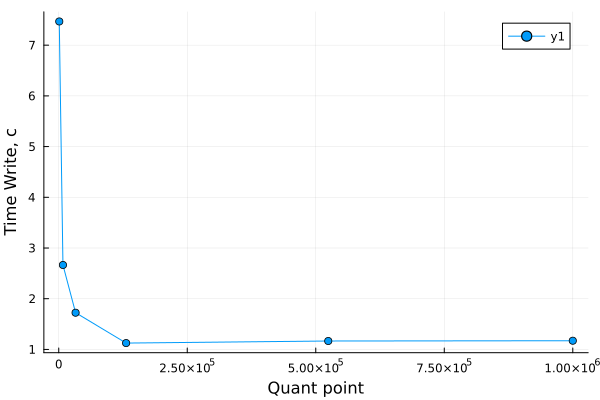

In [3]:
@df df plot(:quant_points, 
            :time_write, 
            xlabel = "Quant point",
            ylabel = "Time Write, c",
            marker = :circle)

Зависимость коеффициента сжатия от размера кванта

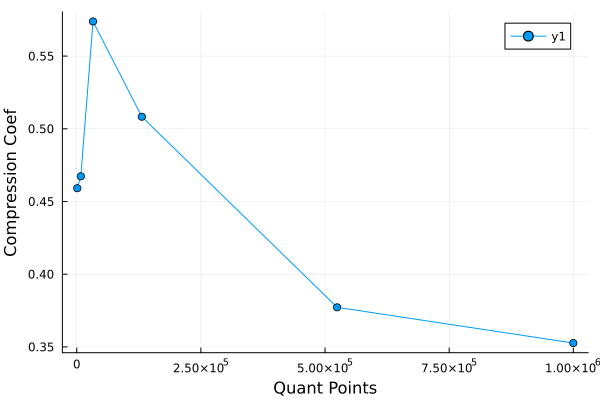

In [4]:
@df df plot(:quant_points, 
            :compression_coef, 
            xlabel = "Quant Points",
            ylabel = "Compression Coef", 
            marker = :circle)

Зависимость времени чтения файла от размера кванта

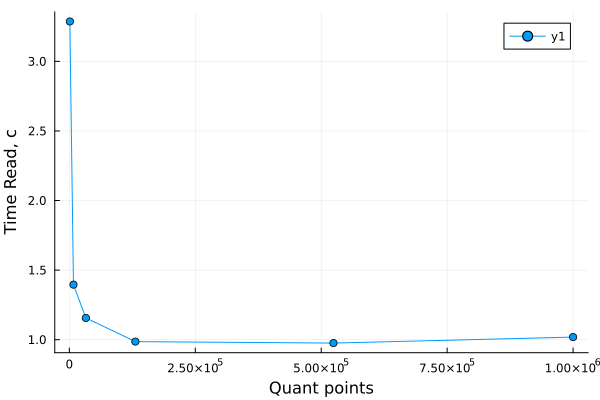

In [5]:
@df df plot(:quant_points, 
            :time_read, 
            xlabel = "Quant points",
            ylabel = "Time Read, c",
            marker = :circle)

Зависимость времени чтения интервала от его размера

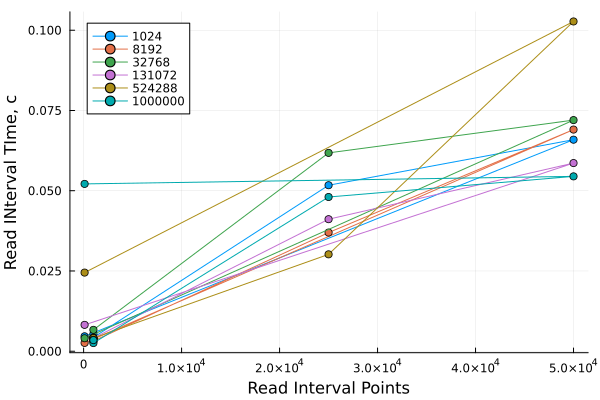

In [7]:
@df df_rand plot(:read_interval_points, 
                 :read_interval_time, 
                 group = :quant_points,
                 xlabel = "Read Interval Points",
                 ylabel = "Read INterval TIme, c",
                 marker = :circle)